In [1]:
! python --version

Python 3.10.12


In [2]:
# ! pip install -q git+https://github.com/keras-team/keras-cv
# ! pip install pandas numpy matplotlib scikit-learn

In [3]:
import os

import keras_cv
# import keras_core as keras
# from keras_core import layers


from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

2023-10-30 16:05:10.414135: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-30 16:05:11.033004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 16:05:11.033061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 16:05:11.034163: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 16:05:11.258077: I tensorflow/core/platform/cpu_feature_g

Using TensorFlow backend


In [4]:
PATH = "archive"

In [5]:
  IMAGE_SIZE = [512, 512]
  BATCH_SIZE = 64
  EPOCHS = 8
  TARGET_COLS  = [
      "bowel_injury", "extravasation_injury",
      "kidney_healthy", "kidney_low", "kidney_high",
      "liver_healthy", "liver_low", "liver_high",
      "spleen_healthy", "spleen_low", "spleen_high",
  ]
  AUTOTUNE = tf.data.AUTOTUNE

In [6]:
dataframe = pd.read_csv(f"{PATH}/train.csv")
dataframe["image_path"] = f"{PATH}/train_images" + "/" + dataframe.patient_id.astype(str) + "/" + dataframe.series_id.astype(str) + "/" + dataframe.instance_number.astype(str) +".png"
dataframe = dataframe.drop_duplicates()

dataframe.tail(10)

patient_id  bowel_healthy  bowel_injury  extravasation_healthy  \
13005        9632              1             0                      0   
13006        9632              1             0                      0   
13007        9632              1             0                      0   
13008        9632              1             0                      0   
13009        9632              1             0                      0   
13010        9632              1             0                      0   
13011        9632              1             0                      0   
13012        9632              1             0                      0   
13013        9632              1             0                      0   
13014        9632              1             0                      0   

       extravasation_injury  kidney_healthy  kidney_low  kidney_high  \
13005                     1               1           0            0   
13006                     1               1           0            0   
13007                     1               1           0            0   
13008                     1               1           0            0   
13009                     1               1           0            0   
13010                     1               1           0            0   
13011                     1               1           0            0   
13012                     1               1           0            0   
13013                     1               1           0            0   
13014                     1               1           0            0   

       liver_healthy  liver_low  ...  spleen_healthy  spleen_low  spleen_high  \
13005              1          0  ...               1           0            0   
13006              1          0  ...               1           0            0   
13007              1          0  ...               1           0            0   
13008              1          0  ...               1           0            0   
13009              1          0  ...               1           0            0   
13010              1          0  ...               1           0            0   
13011              1          0  ...               1           0            0   
13012              1          0  ...               1           0            0   
13013              1          0  ...               1           0            0   
13014              1          0  ...               1           0            0   

       any_injury  series_id  instance_number           injury_name  \
13005           1       3750              150  Active_Extravasation   
13006           1       3750              151  Active_Extravasation   
13007           1       3750              152  Active_Extravasation   
13008           1       3750              153  Active_Extravasation   
13009           1       3750              154  Active_Extravasation   
13010           1       3750              155  Active_Extravasation   
13011           1       3750              156  Active_Extravasation   
13012           1       3750              157  Active_Extravasation   
13013           1       3750              158  Active_Extravasation   
13014           1       3750              159  Active_Extravasation   

                                   image_path width  height  
13005  archive/train_images/9632/3750/150.png   512     512  
13006  archive/train_images/9632/3750/151.png   512     512  
13007  archive/train_images/9632/3750/152.png   512     512  
13008  archive/train_images/9632/3750/153.png   512     512  
13009  archive/train_images/9632/3750/154.png   512     512  
13010  archive/train_images/9632/3750/155.png   512     512  
13011  archive/train_images/9632/3750/156.png   512     512  
13012  archive/train_images/9632/3750/157.png   512     512  
13013  archive/train_images/9632/3750/158.png   512     512  
13014  archive/train_images/9632/3750/159.png   512     512  

[10 rows x 21 columns]

In [7]:
dataframe.head(10)

patient_id  bowel_healthy  bowel_injury  extravasation_healthy  \
0       10004              1             0                      0   
1       10004              1             0                      0   
2       10004              1             0                      0   
3       10004              1             0                      0   
4       10004              1             0                      0   
5       10004              1             0                      0   
6       10004              1             0                      0   
7       10004              1             0                      0   
8       10004              1             0                      0   
9       10004              1             0                      0   

   extravasation_injury  kidney_healthy  kidney_low  kidney_high  \
0                     1               0           1            0   
1                     1               0           1            0   
2                     1               0           1            0   
3                     1               0           1            0   
4                     1               0           1            0   
5                     1               0           1            0   
6                     1               0           1            0   
7                     1               0           1            0   
8                     1               0           1            0   
9                     1               0           1            0   

   liver_healthy  liver_low  ...  spleen_healthy  spleen_low  spleen_high  \
0              1          0  ...               0           0            1   
1              1          0  ...               0           0            1   
2              1          0  ...               0           0            1   
3              1          0  ...               0           0            1   
4              1          0  ...               0           0            1   
5              1          0  ...               0           0            1   
6              1          0  ...               0           0            1   
7              1          0  ...               0           0            1   
8              1          0  ...               0           0            1   
9              1          0  ...               0           0            1   

   any_injury  series_id  instance_number           injury_name  \
0           1      21057              362  Active_Extravasation   
1           1      21057              363  Active_Extravasation   
2           1      21057              364  Active_Extravasation   
3           1      21057              365  Active_Extravasation   
4           1      21057              366  Active_Extravasation   
5           1      21057              367  Active_Extravasation   
6           1      21057              368  Active_Extravasation   
7           1      21057              369  Active_Extravasation   
8           1      21057              370  Active_Extravasation   
9           1      21057              371  Active_Extravasation   

                                 image_path width  height  
0  archive/train_images/10004/21057/362.png   512     512  
1  archive/train_images/10004/21057/363.png   512     512  
2  archive/train_images/10004/21057/364.png   512     512  
3  archive/train_images/10004/21057/365.png   512     512  
4  archive/train_images/10004/21057/366.png   512     512  
5  archive/train_images/10004/21057/367.png   512     512  
6  archive/train_images/10004/21057/368.png   512     512  
7  archive/train_images/10004/21057/369.png   512     512  
8  archive/train_images/10004/21057/370.png   512     512  
9  archive/train_images/10004/21057/371.png   512     512  

[10 rows x 21 columns]

In [8]:
dataframe.groupby('bowel_injury').first()

patient_id  bowel_healthy  extravasation_healthy  \
bowel_injury                                                     
0                  10004              1                      0   
1                  10065              0                      1   

              extravasation_injury  kidney_healthy  kidney_low  kidney_high  \
bowel_injury                                                                  
0                                1               0           1            0   
1                                0               1           0            0   

              liver_healthy  liver_low  liver_high  spleen_healthy  \
bowel_injury                                                         
0                         1          0           0               0   
1                         1          0           0               1   

              spleen_low  spleen_high  any_injury  series_id  instance_number  \
bowel_injury                                                                    
0                      0            1           1      21057              362   
1                      0            0           1      37324               48   

                       injury_name                                image_path  \
bowel_injury                                                                   
0             Active_Extravasation  archive/train_images/10004/21057/362.png   
1                            Bowel   archive/train_images/10065/37324/48.png   

              width  height  
bowel_injury                 
0               512     512  
1               512     512

In [9]:
dataframe.groupby( TARGET_COLS).first()

patient_id  \
bowel_injury extravasation_injury kidney_healthy kidney_low kidney_high liver_healthy liver_low liver_high spleen_healthy spleen_low spleen_high               
0            1                    0              0          1           0             0         1          0              0          1                 32272   
                                                                                      1         0          1              0          0                 16682   
                                                                        1             0         0          0              0          1                 19366   
                                                                                                                          1          0                 17265   
                                                                                                           1              0          0                 13241   
                                                 1          0           0             0         1          1              0          0                 16327   
                                                                                      1         0          0              0          1                 38982   
                                                                                                           1              0          0                 15117   
                                                                        1             0         0          0              0          1                 10004   
                                                                                                                          1          0                 28555   
                                                                                                           1              0          0                 14321   
                                  1              0          0           0             0         1          0              1          0                 16645   
                                                                                                           1              0          0                 18534   
                                                                                      1         0          0              0          1                 10217   
                                                                                                                          1          0                 22755   
                                                                                                           1              0          0                 14102   
                                                                        1             0         0          0              0          1                 11652   
                                                                                                                          1          0                 41306   
                                                                                                           1              0          0                 10292   
1            0                    0              0          1           0             1         0          0              1          0                 60744   
                                                                        1             0         0          1              0          0                 38427   
                                                 1          0           0             1         0          0              0          1                 55888   
                                                                        1             0         0          0              1          0                 54183   
                                  1              0          0           0             1         0          0              0          1            

In [10]:
for key, group in dataframe.groupby(TARGET_COLS):
    print (group ) ;
    break ;

      patient_id  bowel_healthy  bowel_injury  extravasation_healthy  \
4538       32272              1             0                      0   
4539       32272              1             0                      0   
4540       32272              1             0                      0   
4541       32272              1             0                      0   
4542       32272              1             0                      0   
4543       32272              1             0                      0   
4544       32272              1             0                      0   
4545       32272              1             0                      0   
4546       32272              1             0                      0   
4547       32272              1             0                      0   
4548       32272              1             0                      0   
4549       32272              1             0                      0   
4550       32272              1             0                   

In [11]:

train_data = pd.DataFrame()
val_data = pd.DataFrame()


for key, group in dataframe.groupby(TARGET_COLS):
    test_size = 0.2
    if len(group) == 1:
        train_group, val_group = (group, pd.DataFrame()) if np.random.rand() < test_size else (pd.DataFrame(), group)
    else:
        train_group, val_group = train_test_split(group, test_size=test_size, random_state=42)
    train_data = pd.concat([train_data, train_group], ignore_index=True)
    val_data = pd.concat([val_data, val_group], ignore_index=True)

In [12]:

train_data = train_data.drop_duplicates()
val_data = val_data.drop_duplicates()


In [13]:
def decode_image_and_label(image_path, label):
    file_bytes = tf.io.read_file(image_path)
    image = tf.io.decode_png(file_bytes, channels=3, dtype=tf.uint8)
    image = tf.image.resize(image, IMAGE_SIZE, method="bilinear")
    image = tf.cast(image, tf.float32) / 255.0

    label = tf.cast(label, tf.float32)
    #         bowel       fluid       kidney      liver       spleen
    labels = (label[0:1], label[1:2], label[2:5], label[5:8], label[8:11])

    return (image, labels)


def build_dataset(image_paths, labels):
    ds = (
        tf.data.Dataset.from_tensor_slices((image_paths, labels))
        .map(decode_image_and_label, num_parallel_calls=AUTOTUNE)
        .shuffle(BATCH_SIZE * 10)
        .batch(BATCH_SIZE)
        .prefetch(AUTOTUNE)
    )
    return ds


def augment_dataset(ds):
    augmenter = keras_cv.layers.Augmenter(
        [
            keras_cv.layers.RandomFlip(mode="horizontal_and_vertical"),
            keras_cv.layers.RandomCutout(height_factor=0.2, width_factor=0.2),
        ]
    )

    def apply_augmentation(images, labels):
        return (augmenter(images), labels)

    ds = ds.map(apply_augmentation, num_parallel_calls=AUTOTUNE)
    return ds


paths = train_data.image_path.tolist()
labels = train_data[TARGET_COLS].values

# Build the dataset first
ds = build_dataset(image_paths=paths, labels=labels)

# Then augment the dataset
ds = augment_dataset(ds)

# Now you can iterate through the dataset and access images and labels
images, labels = next(iter(ds))
images.shape, [label.shape for label in labels]


2023-10-30 16:05:17.178413: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


(TensorShape([64, 512, 512, 3]),
 [TensorShape([64, 1]),
  TensorShape([64, 1]),
  TensorShape([64, 3]),
  TensorShape([64, 3]),
  TensorShape([64, 3])])

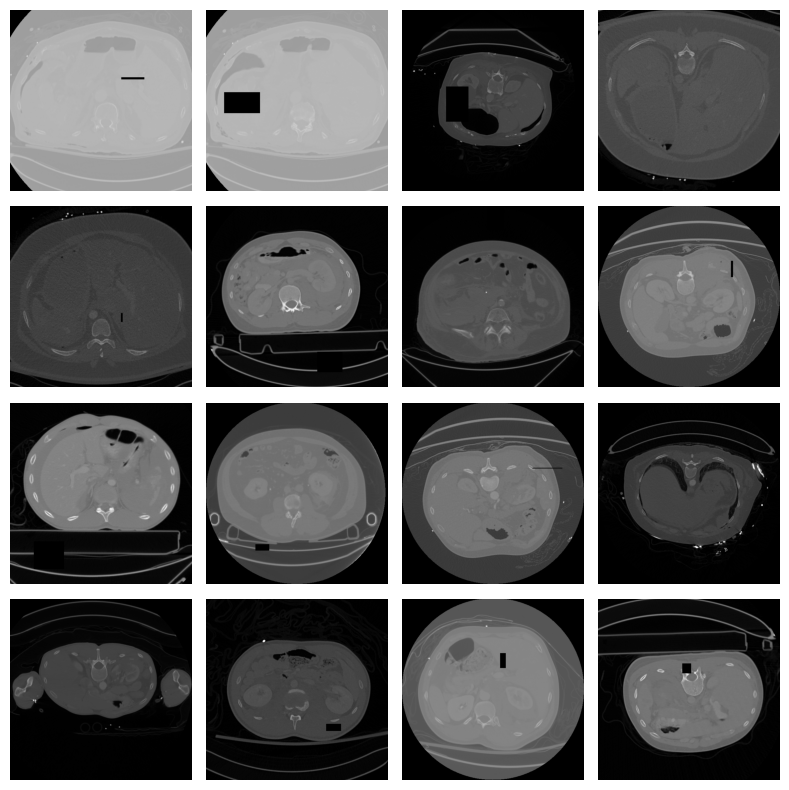

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of rows and columns for the gallery
rows = 4
cols = 4

# Create a figure and a set of subplots
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

# Flatten axes to iterate through them
axes = axes.flatten()

# Iterate through images and plot them
for i in range(rows * cols):
    if i < len(images):
        ax = axes[i]
        ax.imshow(images[i], cmap='gray')  # You may need to specify a colormap based on your image data
        ax.axis('off')  # Turn off axis labels and ticks

# Adjust spacing between subplots
plt.tight_layout()

# Display the gallery
plt.show()


In [15]:
# get image_paths and labels
print("[INFO] Building the dataset...")
train_paths = train_data.image_path.values;
train_labels = train_data[TARGET_COLS].values.astype(np.float32)

valid_paths = val_data.image_path.values;
valid_labels = val_data[TARGET_COLS].values.astype(np.float32)

# train and valid dataset
train_ds = build_dataset(image_paths=train_paths, labels=train_labels)
val_ds = build_dataset(image_paths=valid_paths, labels=valid_labels)

total_train_steps = train_ds.cardinality().numpy() * BATCH_SIZE * EPOCHS
warmup_steps = int(total_train_steps * 0.10)
decay_steps = total_train_steps - warmup_steps

print(f"{total_train_steps=}")
print(f"{warmup_steps=}")
print(f"{decay_steps=}")

[INFO] Building the dataset...
total_train_steps=77312
warmup_steps=7731
decay_steps=69581


# RESNET MODEL

In [17]:
# better resnet model

def build_model(warmup_steps, decay_steps):
    # Define Input
    inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), batch_size=BATCH_SIZE)

    # Define Backbone (You can replace this with any other backbone)
    backbone = keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=inputs, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    backbone.trainable = False
    x = backbone(inputs, training=False )

    # GAP to get the activation maps
    gap = keras.layers.GlobalAveragePooling2D()
    x = gap(x)

    # Define 'necks' for each head
    x_bowel = keras.layers.Dense(32, activation='selu')(x)
    x_extra = keras.layers.Dense(32, activation='selu')(x)
    x_liver = keras.layers.Dense(32, activation='selu')(x)
    x_kidney = keras.layers.Dense(32, activation='selu')(x)
    x_spleen = keras.layers.Dense(32, activation='selu')(x)

    # Define heads
    out_bowel = keras.layers.Dense(1, name='bowel', activation='sigmoid')(x_bowel)
    out_extra = keras.layers.Dense(1, name='extra', activation='sigmoid')(x_extra)
    out_liver = keras.layers.Dense(3, name='liver', activation='softmax')(x_liver)
    out_kidney = keras.layers.Dense(3, name='kidney', activation='softmax')(x_kidney)
    out_spleen = keras.layers.Dense(3, name='spleen', activation='softmax')(x_spleen)

    # Concatenate the outputs
    outputs = [out_bowel, out_extra, out_liver, out_kidney, out_spleen]

    # Create model
    print("[INFO] Building the model...")
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Cosine Decay
    cosine_decay = keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=1e-4,
        decay_steps=decay_steps,
        alpha=0.0,
        warmup_target=1e-3,
        warmup_steps=warmup_steps,
    )

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=cosine_decay)
    loss = {
        "bowel": keras.losses.BinaryCrossentropy(),
        "extra": keras.losses.BinaryCrossentropy(),
        "liver": keras.losses.CategoricalCrossentropy(),
        "kidney": keras.losses.CategoricalCrossentropy(),
        "spleen": keras.losses.CategoricalCrossentropy(),
    }
    metrics = {
        "bowel": ["accuracy"],
        "extra": ["accuracy"],
        "liver": ["accuracy"],
        "kidney": ["accuracy"],
        "spleen": ["accuracy"],
    }
    print("[INFO] Compiling the model...")
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

    return model


In [ ]:
# build the model
print("[INFO] Building the model...")
model = build_model(warmup_steps, decay_steps)
model.summary()

# train
print("[INFO] Training...")
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
)

[INFO] Building the model...
[INFO] Building the model...
[INFO] Compiling the model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(64, 512, 512, 3)]          0         []                            
                                                                                                  
 resnet50 (Functional)       (64, 16, 16, 2048)           2358771   ['input_1[0][0]']             
                                                          2                                       
                                                                                                  
 global_average_pooling2d (  (64, 2048)                   0         ['resnet50[0][0]']            
 GlobalAveragePooling2D)                                                                          
      

In [ ]:
from keras.utils import plot_model
plot_model(model , to_file= 'resnet_model.png' , show_shapes= 'True' , show_layer_names = True )

In [ ]:
! pip install pydot

In [ ]:
# Create a 3x2 grid for the subplots
fig, axes = plt.subplots(5, 1, figsize=(5, 15))

# Flatten axes to iterate through them
axes = axes.flatten()

# Iterate through the metrics and plot them
for i, name in enumerate(["bowel", "extra", "kidney", "liver", "spleen"]):
    # Plot training accuracy
    axes[i].plot(history.history[name + '_accuracy'], label='Training ' + name)
    # Plot validation accuracy
    axes[i].plot(history.history['val_' + name + '_accuracy'], label='Validation ' + name)
    axes[i].set_title(name)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()

In [ ]:
# store best results
best_epoch = np.argmin(history.history['val_loss'])
best_loss = history.history['val_loss'][best_epoch]
best_acc_bowel = history.history['val_bowel_accuracy'][best_epoch]
best_acc_extra = history.history['val_extra_accuracy'][best_epoch]
best_acc_liver = history.history['val_liver_accuracy'][best_epoch]
best_acc_kidney = history.history['val_kidney_accuracy'][best_epoch]
best_acc_spleen = history.history['val_spleen_accuracy'][best_epoch]

# Find mean accuracy
best_acc = np.mean(
    [best_acc_bowel,
     best_acc_extra,
     best_acc_liver,
     best_acc_kidney,
     best_acc_spleen
])


print(f'>>>> BEST Loss  : {best_loss:.3f}\n>>>> BEST Acc   : {best_acc:.3f}\n>>>> BEST Epoch : {best_epoch}\n')
print('ORGAN Acc:')
print(f'  >>>> {"Bowel".ljust(15)} : {best_acc_bowel:.3f}')
print(f'  >>>> {"Extravasation".ljust(15)} : {best_acc_extra:.3f}')
print(f'  >>>> {"Liver".ljust(15)} : {best_acc_liver:.3f}')
print(f'  >>>> {"Kidney".ljust(15)} : {best_acc_kidney:.3f}')
print(f'  >>>> {"Spleen".ljust(15)} : {best_acc_spleen:.3f}')

In [ ]:
# Save the model
model.save(PATH+"/resnet.keras")

# EFFICIENTNET MODEL

In [ ]:
! pip install -q efficientnet

In [ ]:
from efficientnet.tfkeras import EfficientNetB0  # variant (B0, B1, B2, etc.)


def build_model(warmup_steps, decay_steps):
    # Define Input
    inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), batch_size=BATCH_SIZE)

    # Define EfficientNet as the backbone
    base_model = EfficientNetB0(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), include_top=False, weights='imagenet')
    x = base_model(inputs)

    # GAP to get the activation maps
    gap = keras.layers.GlobalAveragePooling2D()
    x = gap(x)

    # Define 'necks' for each head
    x_bowel = keras.layers.Dense(32, activation='selu')(x)
    x_extra = keras.layers.Dense(32, activation='selu')(x)
    x_liver = keras.layers.Dense(32, activation='selu')(x)
    x_kidney = keras.layers.Dense(32, activation='selu')(x)
    x_spleen = keras.layers.Dense(32, activation='selu')(x)

    # Define heads
    out_bowel = keras.layers.Dense(1, name='bowel', activation='sigmoid')(x_bowel)
    out_extra = keras.layers.Dense(1, name='extra', activation='sigmoid')(x_extra)
    out_liver = keras.layers.Dense(3, name='liver', activation='softmax')(x_liver)
    out_kidney = keras.layers.Dense(3, name='kidney', activation='softmax')(x_kidney)
    out_spleen = keras.layers.Dense(3, name='spleen', activation='softmax')(x_spleen)

    # Concatenate the outputs
    outputs = [out_bowel, out_extra, out_liver, out_kidney, out_spleen]

    # Create model
    print("[INFO] Building the model...")
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Cosine Decay
    cosine_decay = keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=1e-4,
        decay_steps=decay_steps,
        alpha=0.0,
        warmup_target=1e-3,
        warmup_steps=warmup_steps,
    )

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=cosine_decay)
    loss = {
        "bowel": keras.losses.BinaryCrossentropy(),
        "extra": keras.losses.BinaryCrossentropy(),
        "liver": keras.losses.CategoricalCrossentropy(),
        "kidney": keras.losses.CategoricalCrossentropy(),
        "spleen": keras.losses.CategoricalCrossentropy(),
    }
    metrics = {
        "bowel": ["accuracy"],
        "extra": ["accuracy"],
        "liver": ["accuracy"],
        "kidney": ["accuracy"],
        "spleen": ["accuracy"],
    }
    print("[INFO] Compiling the model...")
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

    return model


In [ ]:
# build the model
print("[INFO] Building the model...")
model = build_model(warmup_steps, decay_steps)
model.summary()

# train
print("[INFO] Training...")
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
)

In [ ]:
from keras.utils import plot_model
plot_model(model , to_file= 'efficientnet_model.png' , show_shapes= 'True' , show_layer_names = True )

In [ ]:
# Create a 3x2 grid for the subplots
fig, axes = plt.subplots(5, 1, figsize=(5, 15))

# Flatten axes to iterate through them
axes = axes.flatten()

# Iterate through the metrics and plot them
for i, name in enumerate(["bowel", "extra", "kidney", "liver", "spleen"]):
    # Plot training accuracy
    axes[i].plot(history.history[name + '_accuracy'], label='Training ' + name)
    # Plot validation accuracy
    axes[i].plot(history.history['val_' + name + '_accuracy'], label='Validation ' + name)
    axes[i].set_title(name)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()

In [ ]:
# store best results
best_epoch = np.argmin(history.history['val_loss'])
best_loss = history.history['val_loss'][best_epoch]
best_acc_bowel = history.history['val_bowel_accuracy'][best_epoch]
best_acc_extra = history.history['val_extra_accuracy'][best_epoch]
best_acc_liver = history.history['val_liver_accuracy'][best_epoch]
best_acc_kidney = history.history['val_kidney_accuracy'][best_epoch]
best_acc_spleen = history.history['val_spleen_accuracy'][best_epoch]

# Find mean accuracy
best_acc = np.mean(
    [best_acc_bowel,
     best_acc_extra,
     best_acc_liver,
     best_acc_kidney,
     best_acc_spleen
])


print(f'>>>> BEST Loss  : {best_loss:.3f}\n>>>> BEST Acc   : {best_acc:.3f}\n>>>> BEST Epoch : {best_epoch}\n')
print('ORGAN Acc:')
print(f'  >>>> {"Bowel".ljust(15)} : {best_acc_bowel:.3f}')
print(f'  >>>> {"Extravasation".ljust(15)} : {best_acc_extra:.3f}')
print(f'  >>>> {"Liver".ljust(15)} : {best_acc_liver:.3f}')
print(f'  >>>> {"Kidney".ljust(15)} : {best_acc_kidney:.3f}')
print(f'  >>>> {"Spleen".ljust(15)} : {best_acc_spleen:.3f}')

In [ ]:
# Save the model
model.save(PATH+"/efficientnet.keras")

# VGG 16 MODEL

In [ ]:
def build_model(warmup_steps, decay_steps):
    # Define Input
    inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), batch_size=BATCH_SIZE)

    # Define Backbone (Use VGG16)
    backbone = keras.applications.VGG16(weights='imagenet', include_top=False, input_tensor=inputs, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    backbone.trainable = False
    x = backbone(inputs, training=False)

    # GAP to get the activation maps
    gap = keras.layers.GlobalAveragePooling2D()
    x = gap(x)

    # Define 'necks' for each head
    x_bowel = keras.layers.Dense(32, activation='selu')(x)
    x_extra = keras.layers.Dense(32, activation='selu')(x)
    x_liver = keras.layers.Dense(32, activation='selu')(x)
    x_kidney = keras.layers.Dense(32, activation='selu')(x)
    x_spleen = keras.layers.Dense(32, activation='selu')(x)

    # Define heads
    out_bowel = keras.layers.Dense(1, name='bowel', activation='sigmoid')(x_bowel)
    out_extra = keras.layers.Dense(1, name='extra', activation='sigmoid')(x_extra)
    out_liver = keras.layers.Dense(3, name='liver', activation='softmax')(x_liver)
    out_kidney = keras.layers.Dense(3, name='kidney', activation='softmax')(x_kidney)
    out_spleen = keras.layers.Dense(3, name='spleen', activation='softmax')(x_spleen)

    # Concatenate the outputs
    outputs = [out_bowel, out_extra, out_liver, out_kidney, out_spleen]

    # Create the model
    print("[INFO] Building the model...")
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Cosine Decay
    cosine_decay = keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=1e-4,
        decay_steps=decay_steps,
        alpha=0.0,
        warmup_target=1e-3,
        warmup_steps=warmup_steps,
    )

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=cosine_decay)
    loss = {
        "bowel": keras.losses.BinaryCrossentropy(),
        "extra": keras.losses.BinaryCrossentropy(),
        "liver": keras.losses.CategoricalCrossentropy(),
        "kidney": keras.losses.CategoricalCrossentropy(),
        "spleen": keras.losses.CategoricalCrossentropy(),
    }
    metrics = {
        "bowel": ["accuracy"],
        "extra": ["accuracy"],
        "liver": ["accuracy"],
        "kidney": ["accuracy"],
        "spleen": ["accuracy"],
    }
    print("[INFO] Compiling the model...")
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

    return model


In [ ]:
# build the model
print("[INFO] Building the model...")
model = build_model(warmup_steps, decay_steps)
model.summary()

# train
print("[INFO] Training...")
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
)

In [ ]:
from keras.utils import plot_model
plot_model(model , to_file= 'vgg16_model.png' , show_shapes= 'True' , show_layer_names = True )

In [ ]:
# Create a 3x2 grid for the subplots
fig, axes = plt.subplots(5, 1, figsize=(5, 15))

# Flatten axes to iterate through them
axes = axes.flatten()

# Iterate through the metrics and plot them
for i, name in enumerate(["bowel", "extra", "kidney", "liver", "spleen"]):
    # Plot training accuracy
    axes[i].plot(history.history[name + '_accuracy'], label='Training ' + name)
    # Plot validation accuracy
    axes[i].plot(history.history['val_' + name + '_accuracy'], label='Validation ' + name)
    axes[i].set_title(name)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()

In [ ]:
# store best results
best_epoch = np.argmin(history.history['val_loss'])
best_loss = history.history['val_loss'][best_epoch]
best_acc_bowel = history.history['val_bowel_accuracy'][best_epoch]
best_acc_extra = history.history['val_extra_accuracy'][best_epoch]
best_acc_liver = history.history['val_liver_accuracy'][best_epoch]
best_acc_kidney = history.history['val_kidney_accuracy'][best_epoch]
best_acc_spleen = history.history['val_spleen_accuracy'][best_epoch]

# Find mean accuracy
best_acc = np.mean(
    [best_acc_bowel,
     best_acc_extra,
     best_acc_liver,
     best_acc_kidney,
     best_acc_spleen
])


print(f'>>>> BEST Loss  : {best_loss:.3f}\n>>>> BEST Acc   : {best_acc:.3f}\n>>>> BEST Epoch : {best_epoch}\n')
print('ORGAN Acc:')
print(f'  >>>> {"Bowel".ljust(15)} : {best_acc_bowel:.3f}')
print(f'  >>>> {"Extravasation".ljust(15)} : {best_acc_extra:.3f}')
print(f'  >>>> {"Liver".ljust(15)} : {best_acc_liver:.3f}')
print(f'  >>>> {"Kidney".ljust(15)} : {best_acc_kidney:.3f}')
print(f'  >>>> {"Spleen".ljust(15)} : {best_acc_spleen:.3f}')

In [ ]:
# Save the model
model.save(PATH+"/vgg16.keras")